Plotting categorical data is an important step in exploring and visualizing the distribution and relationships between categorical variables. In this tutorial, we will cover some common plots for categorical data using R. As usual, we will be employing **ggplot** for this.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Now, to illustrate this in this tutorial, we will be utilizing a dataset from a clinical trial. The trial involved administering a drug to some participants and a placebo to others, and their progress was monitored. At the end of the study, it was determined whether the participants' progress had worsened, remained the same, or improved.

In [2]:
dat<-read.csv("https://raw.githubusercontent.com/jrasero/cm-85309-2023/main/datasets/tutorial8chisquare.csv")
head(dat)

,group,evolution
,<chr>,<chr>
1,Placebo,Worse
2,Placebo,Worse
3,Placebo,Worse
4,Placebo,Worse
5,Placebo,Worse
6,Placebo,Worse


# Bar plot

A bar plot is the simplest plot to show the frequency or proportion of each category in **one** categorical variable. To create a bar plot in R, we can use `geom_bar`.

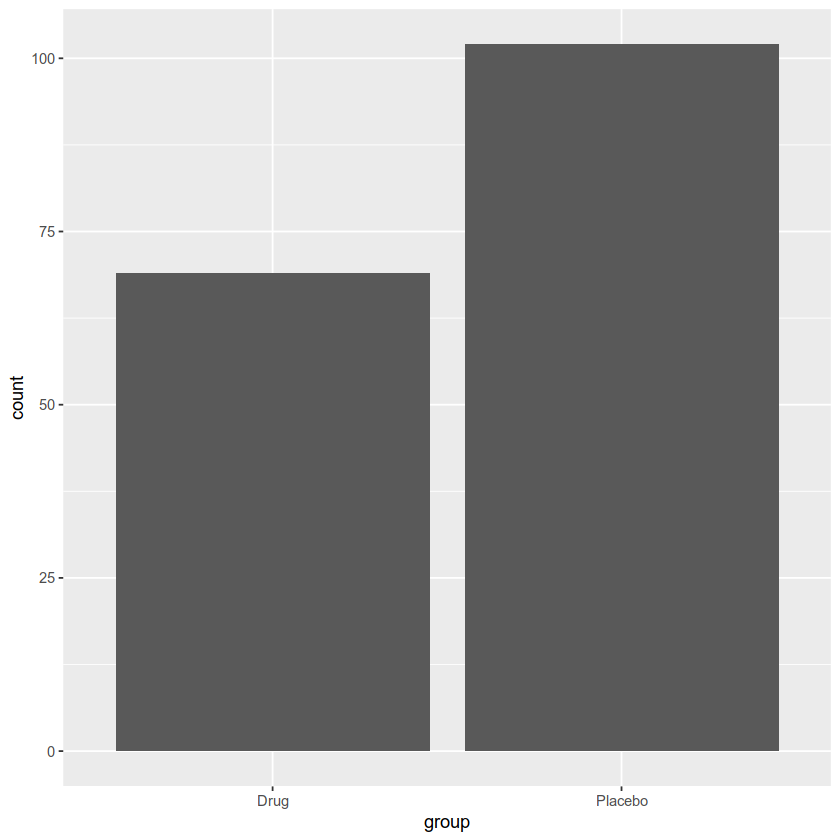

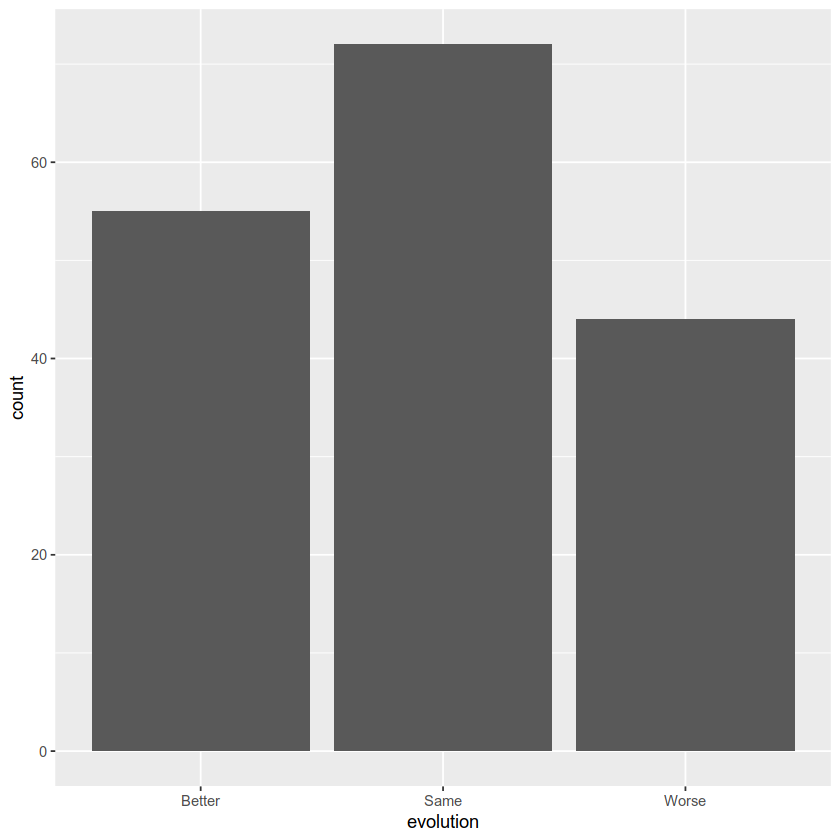

In [3]:
ggplot(data = dat, mapping = aes(group)) + geom_bar()

ggplot(data = dat, mapping = aes(evolution)) + geom_bar()

This is nice, but it only shows the information in one categorical variable. Some times, we will want to see the relationship between two categorical variables, and for that, we will need to incorporate both variables to the same plot. This can be achieved using either a **grouped bar plot**, or a **stacked bar plot**.

# Grouped bar plot

A grouped bar plot is a plot that shows the frequency or proportion of each category in a categorical variable, as well as the distribution of another categorical variable between categories. In this case, the proportions across the levels in one categorical variable are shown next to each other within each level of the other categorical variable. To create a grouped bar plot in R, we can use `geom_bar` function with the position = "dodge" argument to create the grouped bars.

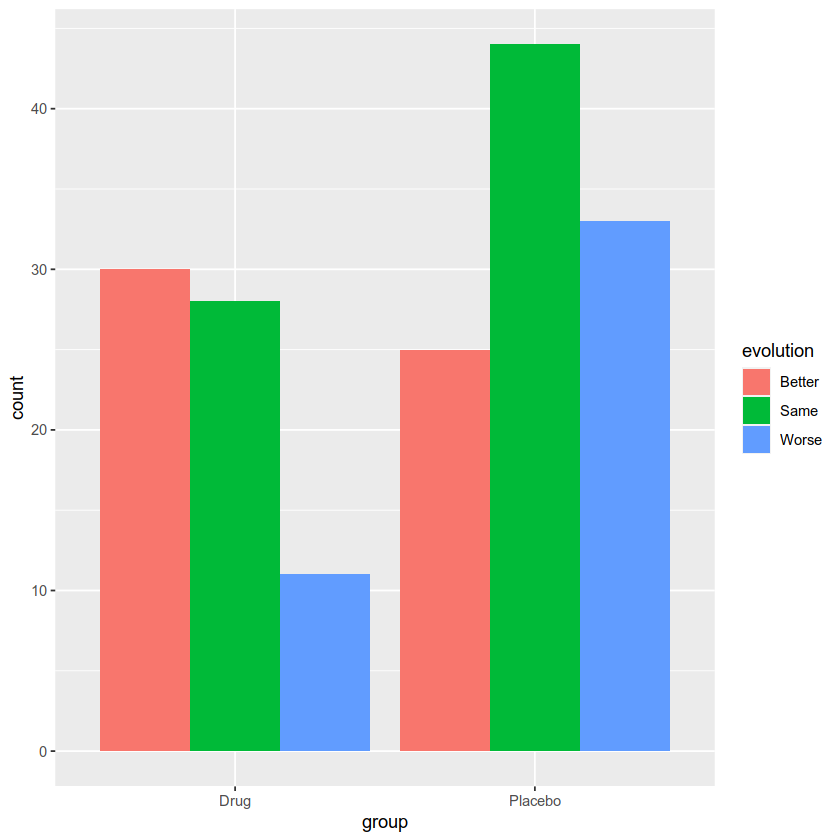

In [4]:
ggplot(data = dat, mapping = aes(x=group, fill=evolution)) + geom_bar(position = "dodge")

The *fill* argument in `aes` specifies the variable to fill the bars, and position = "dodge" creates the grouped bars.

# Stacked bar plot

A stacked bar plot is a plot that displays the frequency or proportion of each category in a categorical variable, as well as the distribution of another categorical variable within each category. It is similar to the grouped bar plot, but here, bars within the levels of one categorical variable are stacked on top of each other. This is useful to see if there are differences in the proportions across levels in the categorical variable. To create a stacked bar plot in R, we can use `geom_bar` function with the position = "fill" argument to create the stacked bars.

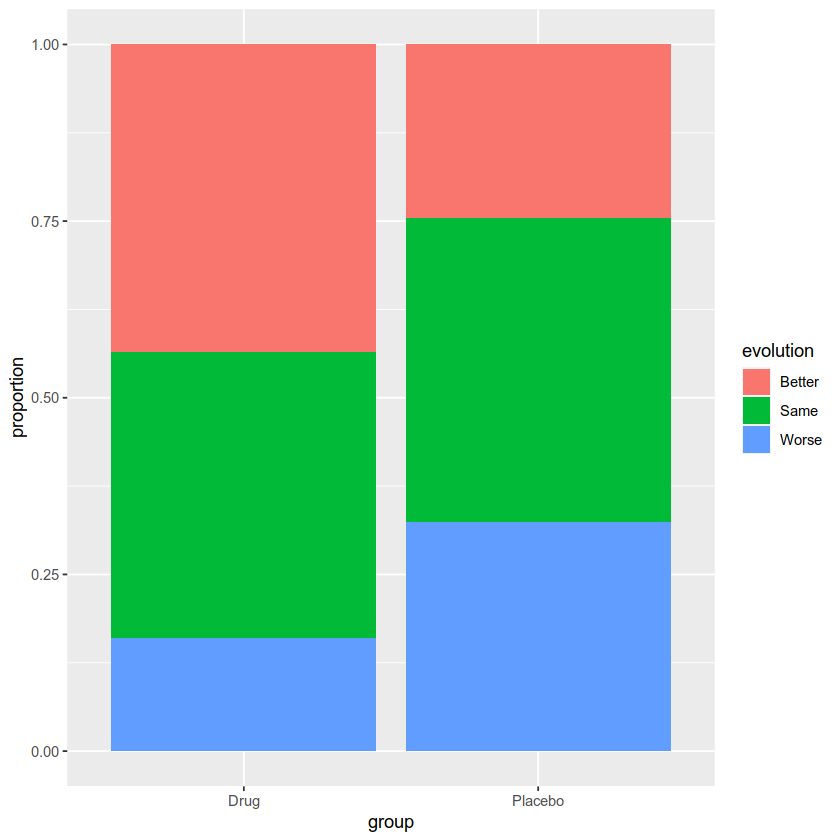

In [5]:
ggplot(data = dat, mapping = aes(x=group, fill=evolution)) + 
geom_bar(position = "fill") +
ylab("proportion")

The *fill* argument in `aes` specifies the variable to fill the bars, and position = "fill" creates the stacked bars.

This plot has the limitation of not showing the number of observations contributed to each bar. One solution to this issue is to include the counts on the plot. To do this, you must specify the counts for each group. There are two ways to do this. The first method uses the `stat_*` functions provided by **ggplot**, which offer computed aesthetics such as bar height for a bar plot. To add labels to your plot using `stat_count`, you must specify how the data should be represented by setting the *geom* argument = "text". The second method is necessary when using a computed aesthetic as an argument to `aes`. To accomplish this, **ggplot** provides the `after_stat` function, which takes the name of the required statistic (in this case, count) as its argument. Additionally, you may need to adjust the height of labels by changing the argument *position*.

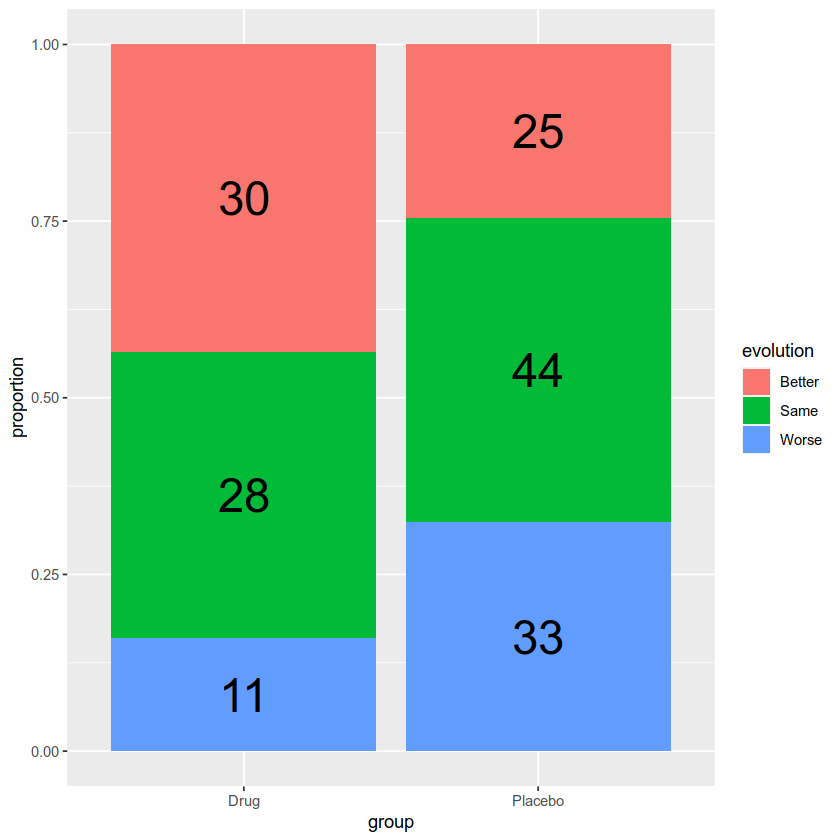

In [6]:
ggplot(data = dat, mapping = aes(x=group, fill=evolution)) + geom_bar(position = "fill") + 
ylab("proportion") +
    stat_count(geom = "text", 
               aes(label = after_stat(count)),
               position=position_fill(vjust=0.5),
               size=10,
               colour="black")

This is great, but wouldn't it be even better if we could show the proportions instead of the actual observed occurrences that depend on the total number of observations in each categorical level? In the end, when analyzing categorical data to detect differences across populations, we should look at the proportions. Here below is an example of how to do this (found in stackoverflow: https://stackoverflow.com/questions/63653351/how-to-use-stat-count-to-label-a-bar-chart-with-counts-or-percentages-in-ggplo)

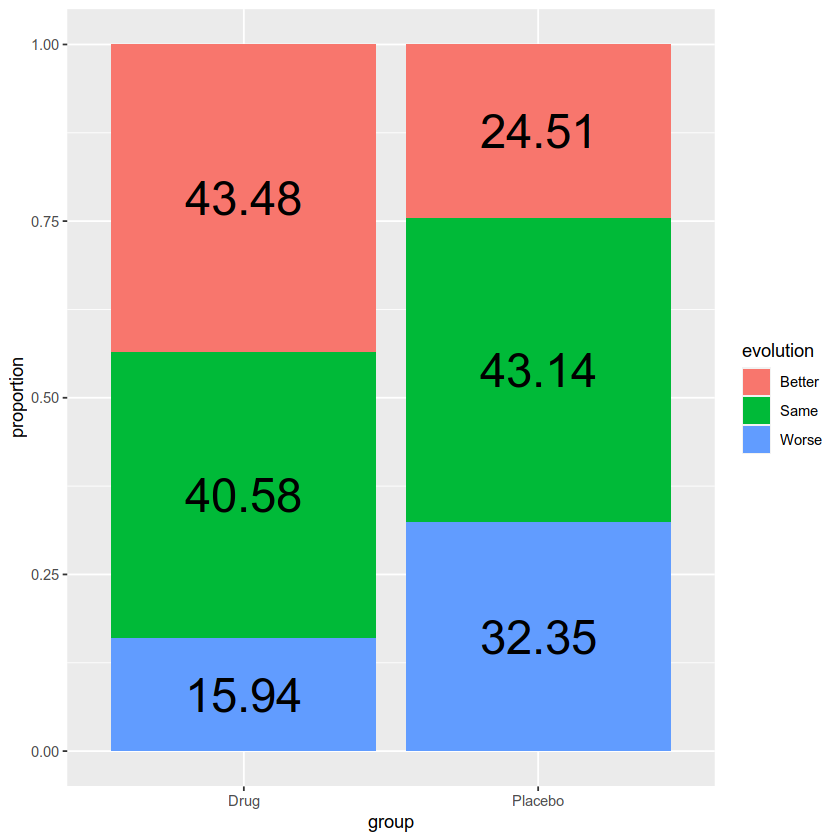

In [7]:
ggplot(data = dat, mapping = aes(x=group, fill=evolution)) + geom_bar(position = "fill") + 
ylab("proportion") +
    stat_count(geom = "text", 
               aes(label = after_stat(round(100*count / tapply(count, x, sum)[as.character(x)], 2))),
               position=position_fill(vjust=0.5),
               size=10,
               colour="black")

## Mosaic plot

Another fancy way of showing the the relationship between two categorical variables in a way that reflects the proportions of each category is by means of a mosaic plot. In this case, to create a mosaic plot we can just use the `mosaicplot` R built-in function.

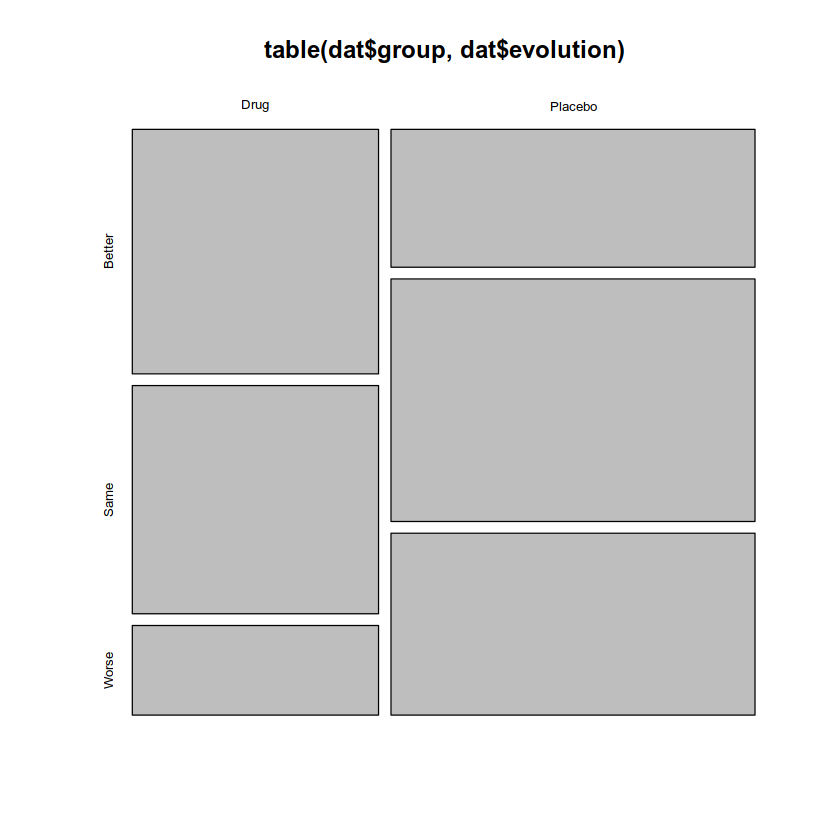

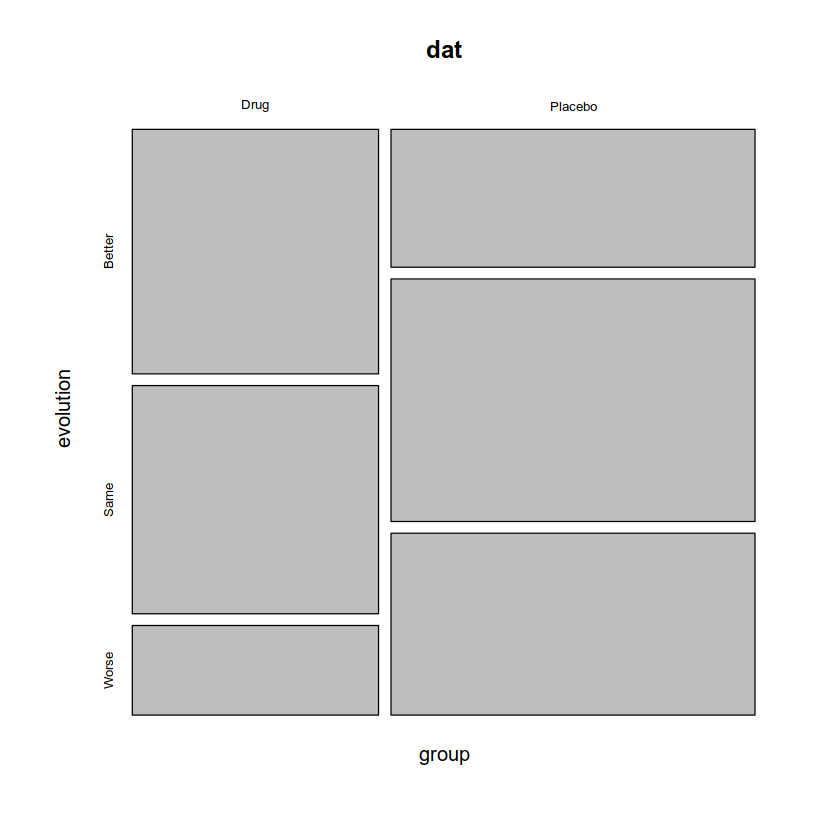

In [8]:
mosaicplot(table(dat$group, dat$evolution))
mosaicplot(group~evolution, data = dat)

More code recipes on how to create all of these kinds of plots:

https://r-graph-gallery.com/barplot.html